## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [4]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

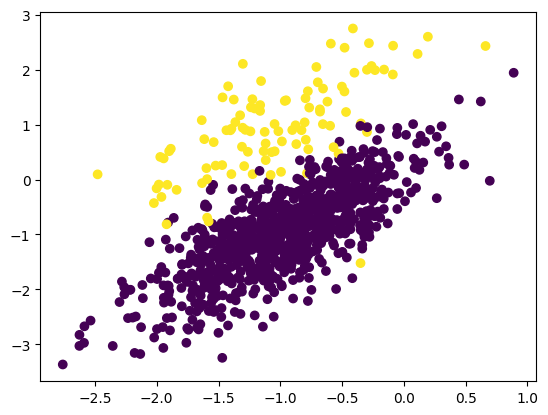

In [6]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [7]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.1 MB 12.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 10.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 9.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 8.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 7.1 MB/s eta 0:00

  You can safely remove it manually.


In [9]:
from imblearn.over_sampling import SMOTE

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [13]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [14]:
X.shape

(1800, 2)

In [15]:
y.shape

(1800,)

In [18]:
len(y[y==0])

900

In [19]:
len(y[y==1])

900

In [20]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

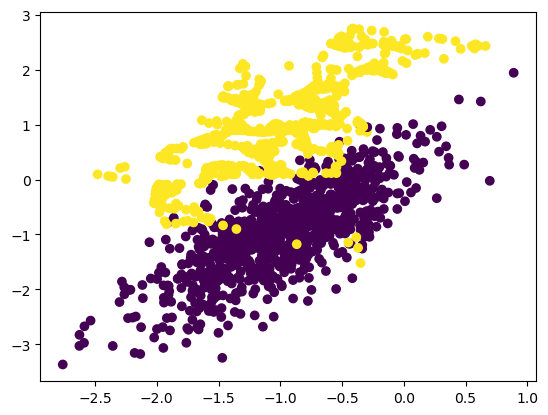

In [21]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])